In [3]:

import os
import sys
import json
from pathlib import Path

import fsspec
from ipfsspec import IPFSFileSystem
import xarray as xr
import zarr
import itk
import pandas as pd
import numpy as np

with fsspec.open("ipfs://bafybeiahpd4hu2kmn7wahpya7mjg2taxrnyzoinbogfihczbk4lea7afx4/index.json") as f:
    DATA_INDEX = json.loads(f.read().decode())
with fsspec.open("ipfs://bafybeidaig6wqbm2ceqlucupqpzuez6b2jbrirkrwwifhnmoj5phxtfhku/index.csv") as f:
    DATA_DF = pd.read_csv(f, index_col=0)
IPFS_FS = IPFSFileSystem()

assert 'PatientID-bafkreiah5rzjpxhr3ymnl6olxp5frrelzjtowgt5jhqswgrjyfggqncxbi' in DATA_INDEX
assert 'PatientID-bafkreic62j4gzv6uwb2ma3pebxo6kkbmxee6zuq4xmsncga2igr3jxuday' in DATA_INDEX
assert 'PatientID-bafkreigg24usipez5ag3qe4p3xxaic3bnsc6ppttotw3rtoqb2t3higpgi' in DATA_INDEX

patient = DATA_INDEX[next(iter(DATA_INDEX))]
assert 'Month-0' in patient
assert 'Month-12' in patient
assert 'Month-96' in patient

month = patient[next(iter(patient))]
assert 'SAG_3D_DESS_0.zarr' in month
assert 'SAG_3D_DESS_1.zarr' in month

image_name = next(iter(month))
cid = month[image_name]
store = IPFS_FS.get_mapper(f'ipfs://{cid}')
image_ds = xr.open_zarr(store)
image_da = image_ds.SAG_3D_DESS_0
image = itk.image_from_xarray(image_da)
assert image['laterality'] == 'left'
assert image.ndim == 3
assert np.array_equal(image.shape, (160, 384, 384))
assert np.allclose(itk.spacing(image), (0.364583, 0.364583, 0.7))
assert np.allclose(itk.origin(image), (132.114, -77.5544, 77.7482))
assert np.max(image) == 1515

columns = DATA_DF.columns
assert columns[0] == 'Months'
assert columns[1] == 'PatientID'
assert columns[2] == 'Laterality'
assert columns[3] == 'Path'
assert columns[4] == 'CID'
assert columns[5] == 'Type'
assert columns[6] == 'Name'

dfv = DATA_DF[DATA_DF['CID'] == 'bafybeia4pjdi47ro4v7tvbv24yuackxw23v7l4opkhsyrhjkoovjqcrmxy'].values[0]
assert dfv[0] == 96
assert dfv[1] == 'bafkreigg24usipez5ag3qe4p3xxaic3bnsc6ppttotw3rtoqb2t3higpgi'
assert dfv[2] == 'right'
assert dfv[3] == 'PatientID-bafkreigg24usipez5ag3qe4p3xxaic3bnsc6ppttotw3rtoqb2t3higpgi/Month-96/Images/SAG_3D_DESS_1.zarr'
assert dfv[4] == 'bafybeia4pjdi47ro4v7tvbv24yuackxw23v7l4opkhsyrhjkoovjqcrmxy'
assert dfv[5] == 'Image'
assert dfv[6] == 'SEG_3D_DESS_1'

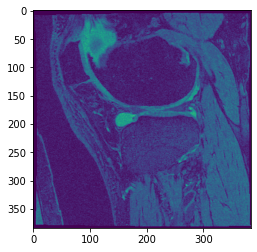

In [5]:
import matplotlib.pyplot as plt
plt.imshow(image[40])

In [10]:
import data.OAI_data
test_image = data.OAI_data.get_images(patient_id= [9279291])[0]

AttributeError: module 'data.OAI_data' has no attribute 'get_images'

In [7]:
cd ..

/playpen-raid1/tgreer/OAI_analysis
